In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os 

In [2]:
def plot_run_length(df, rl, ax, nof_epochs, step_sizes=[-1, -1]):
    if step_sizes[0] == -1:
        raise ValueError('Please provide step sizes')
    
    x_ticks = np.linspace(0, nof_epochs, nof_epochs//10+1)

    nof_steps = [rl*step_sizes[0], rl*step_sizes[1]]
    
    step_counter = 0
    for i in range(int(nof_epochs * 2 // rl)):
        color = ["green", "orange"][i % 2]
        step_size = step_sizes[i % 2]
        nof_step = nof_steps[i % 2]
        
        df_batch = df.iloc[step_counter:step_counter + nof_step]
        
        x_steps = np.linspace(i * rl, (i + 1) * rl, df_batch.shape[0])/2.0 # Divide by 2 to get the epoch, similar to the paper
        step_counter += nof_step
        
        ax.scatter(x_steps, df_batch['all_accuracies'] / 100, color=color, s=2)

    y_ticks = np.linspace(0, 1, 11)
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks.astype(int))
    ax.set_yticks(y_ticks)
    ax.set_title('Run Length ' + str(rl))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Train Accuracy')
    ax.legend(['Head 1', 'Head 2'])

In [37]:
def plot_validation(df, rl, ax, nof_epochs, step_sizes=[-1, -1]):
    if step_sizes[0] == -1:
        raise ValueError('Please provide step sizes')
    
    x_ticks = np.linspace(0, nof_epochs, nof_epochs//10+1)

    total_steps = (step_sizes[0] + step_sizes[1])*nof_epochs
    x_steps = np.linspace(0, nof_epochs, total_steps)

    print('Total steps:', total_steps)
    ax.scatter(x_steps, df['all_accuracies_val1'] / 100, color='green', s=2)
    ax.scatter(x_steps, df['all_accuracies_val2'] / 100, color='orange', s=2)

    y_ticks = np.linspace(0, 1, 11)
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks.astype(int))
    ax.set_yticks(y_ticks)
    ax.set_title('Run Length ' + str(rl))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Accuracy')
    ax.legend(['Head 1', 'Head 2'])

# CIFAR5-CIFAR5

In [21]:
folder = './cifar5_cifar5'
files = os.listdir(folder)
json_files = [f for f in files if f.endswith('.json')]
#sort the json files
json_files = sorted(json_files, key=lambda x: int(x.split('_')[0][2:]))

dfs = []  # dfs list 
rls = [ int(filename.split('_')[0][2:]) for filename in json_files]
rls = sorted(rls, key=lambda x: int(x)) # sort the rls

# Read the json files via pd.read_json
for file in json_files:
    df = pd.read_json(folder + '/' + file)
    dfs.append(df)

json_files, rls

(['rl3_bs512_epochs90_SGD_lr0.02_momentum0.0.json',
  'rl6_bs512_epochs90_SGD_lr0.02_momentum0.0.json',
  'rl15_bs512_epochs90_SGD_lr0.02_momentum0.0.json'],
 [3, 6, 15])

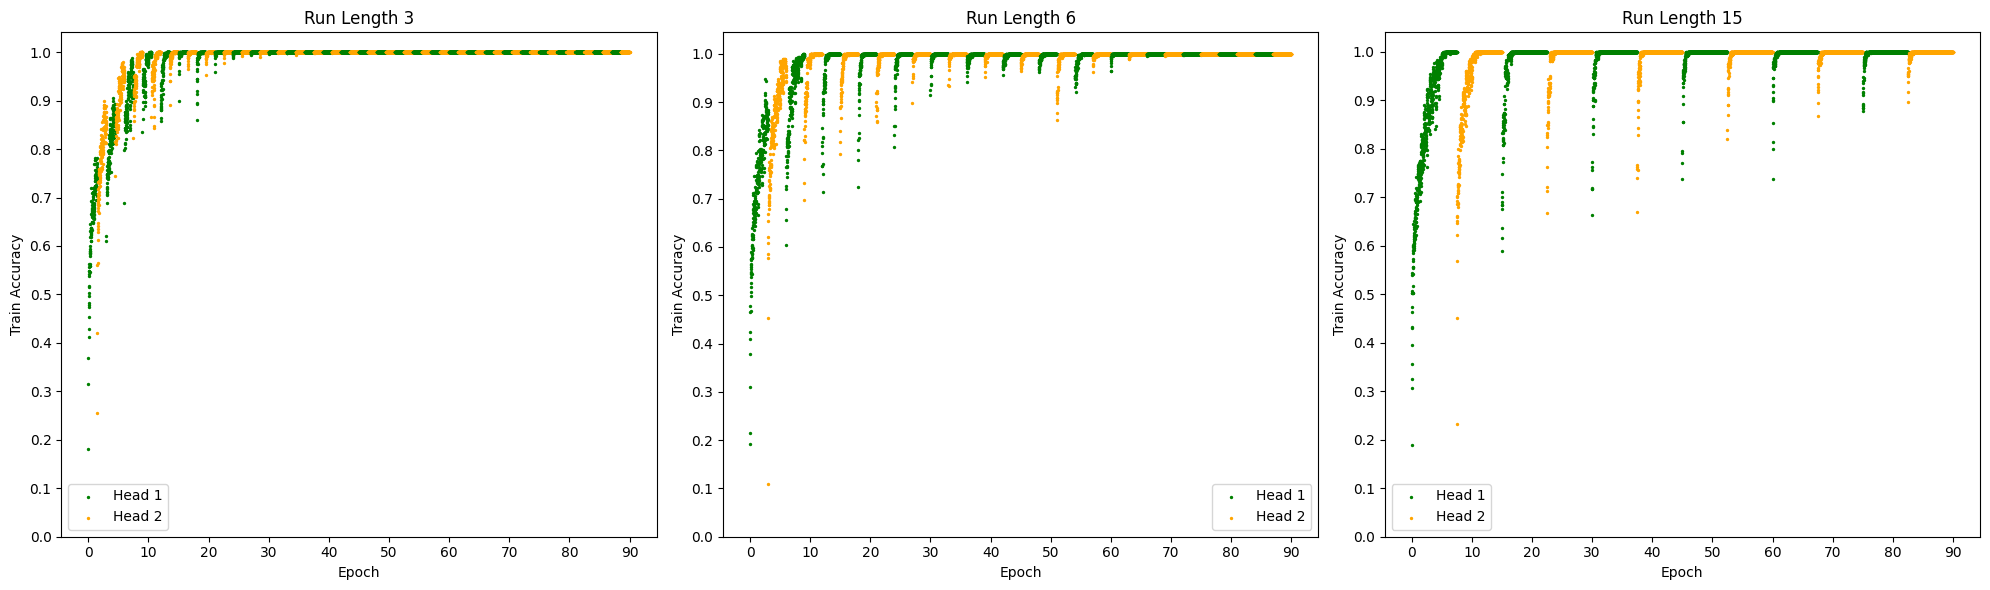

In [12]:
nof_epochs = 90
step_sizes = [49, 49]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_run_length(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}.png")
plt.show()


Total steps: 8820
Total steps: 8820
Total steps: 8820


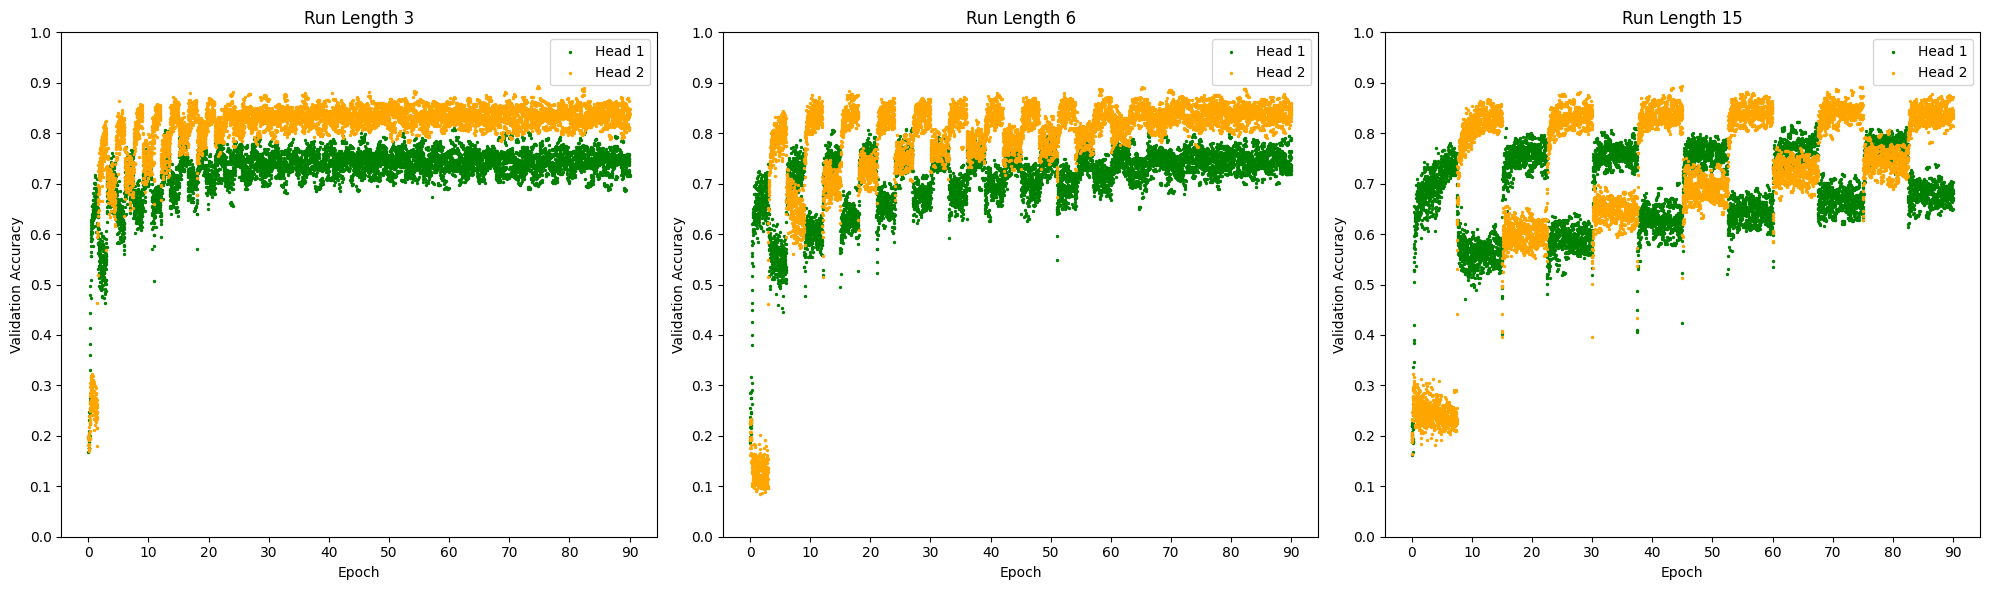

In [38]:
nof_epochs = 90
step_sizes = [49, 49]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_validation(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}_validation.png")
plt.show()


# CIFAR50-CIFAR50

In [39]:
folder = './cifar50_cifar50'
files = os.listdir(folder)
json_files = [f for f in files if f.endswith('.json')]
#sort the json files
json_files = sorted(json_files, key=lambda x: int(x.split('_')[0][2:]))

dfs = []  # dfs list 
rls = [ int(filename.split('_')[0][2:]) for filename in json_files]
rls = sorted(rls, key=lambda x: int(x)) # sort the rls

# Read the json files via pd.read_json
for file in json_files:
    df = pd.read_json(folder + '/' + file)
    dfs.append(df)

json_files, rls

(['rl3_bs512_epochs120_SGD_lr0.02_momentum0.0.json',
  'rl6_bs512_epochs120_SGD_lr0.02_momentum0.0.json',
  'rl15_bs512_epochs120_SGD_lr0.02_momentum0.0.json'],
 [3, 6, 15])

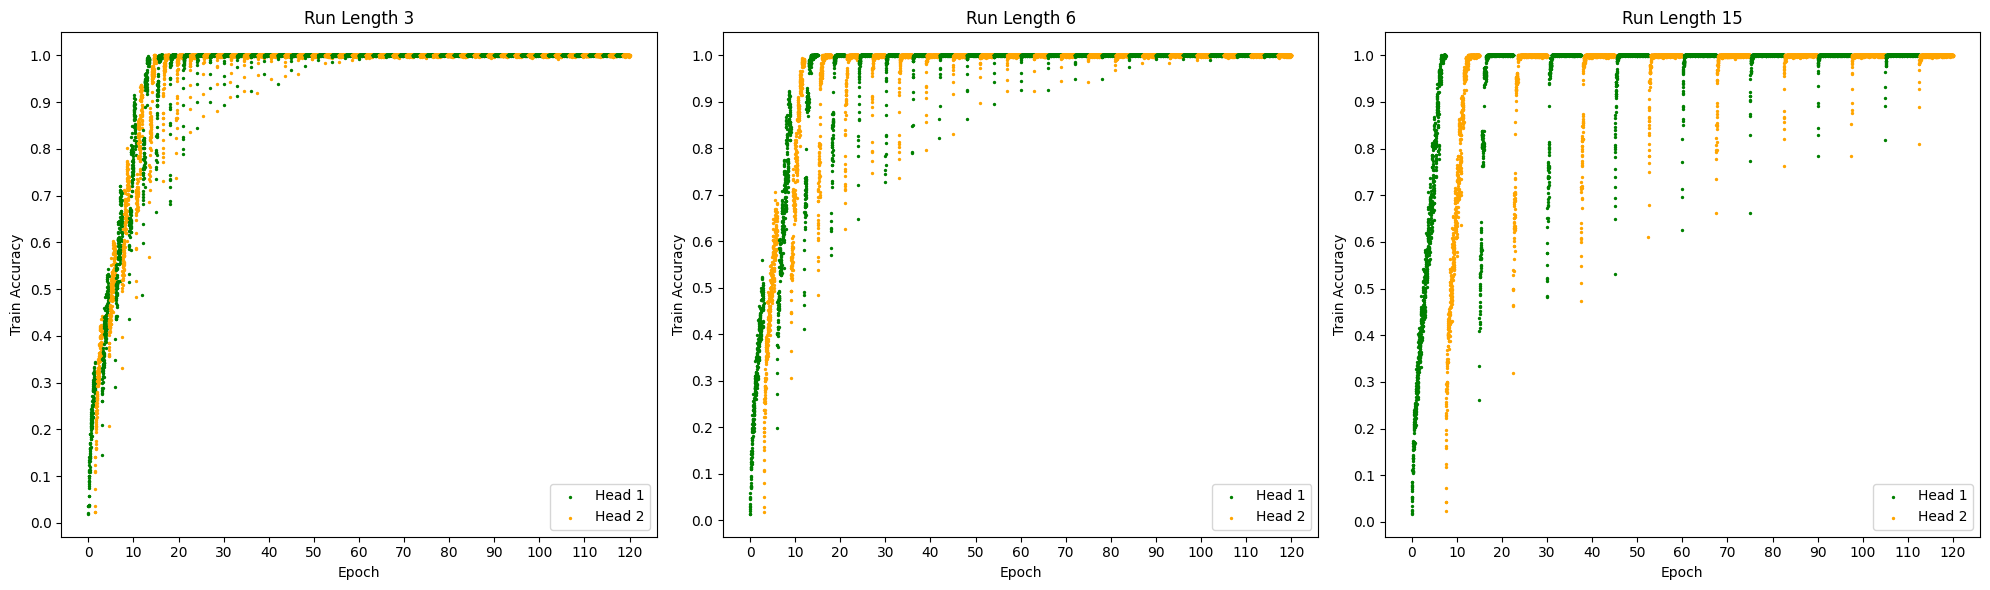

In [40]:
nof_epochs = 120
step_sizes = [49, 49]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_run_length(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}.png")
plt.show()


Total steps: 11760
Total steps: 11760
Total steps: 11760


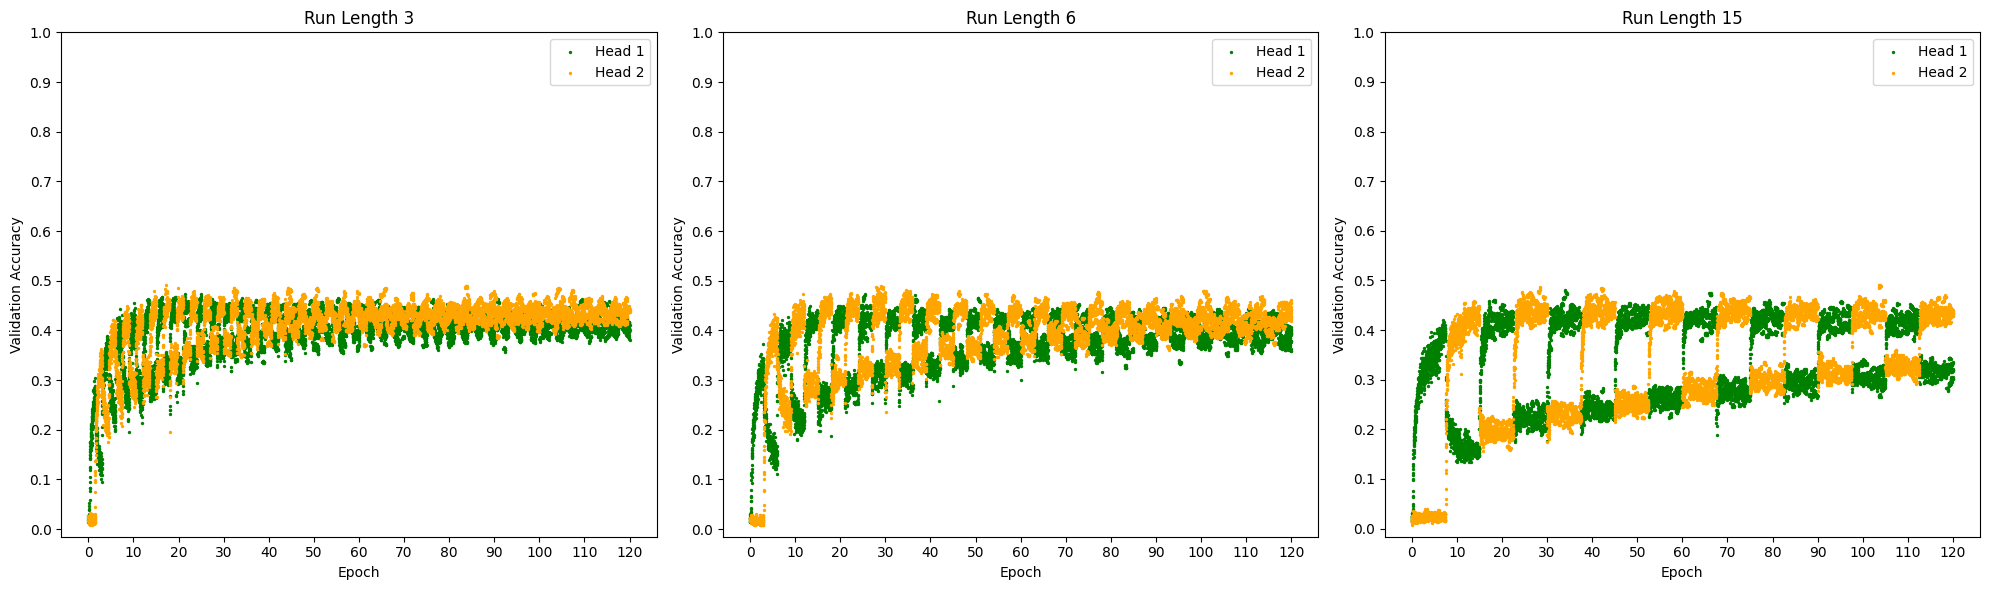

In [41]:
nof_epochs = 120
step_sizes = [49, 49]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_validation(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}_validation.png")
plt.show()


# STL5-STL5

In [42]:
folder = './stl5_stl5'
files = os.listdir(folder)
json_files = [f for f in files if f.endswith('.json')]
#sort the json files
json_files = sorted(json_files, key=lambda x: int(x.split('_')[0][2:]))

dfs = []  # dfs list 
rls = [ int(filename.split('_')[0][2:]) for filename in json_files]
rls = sorted(rls, key=lambda x: int(x)) # sort the rls

# Read the json files via pd.read_json
for file in json_files:
    df = pd.read_json(folder + '/' + file)
    dfs.append(df)

json_files, rls

(['rl3_bs64_epochs90_SGD_lr0.02_momentum0.0.json',
  'rl6_bs64_epochs90_SGD_lr0.02_momentum0.0.json',
  'rl15_bs64_epochs90_SGD_lr0.02_momentum0.0.json'],
 [3, 6, 15])

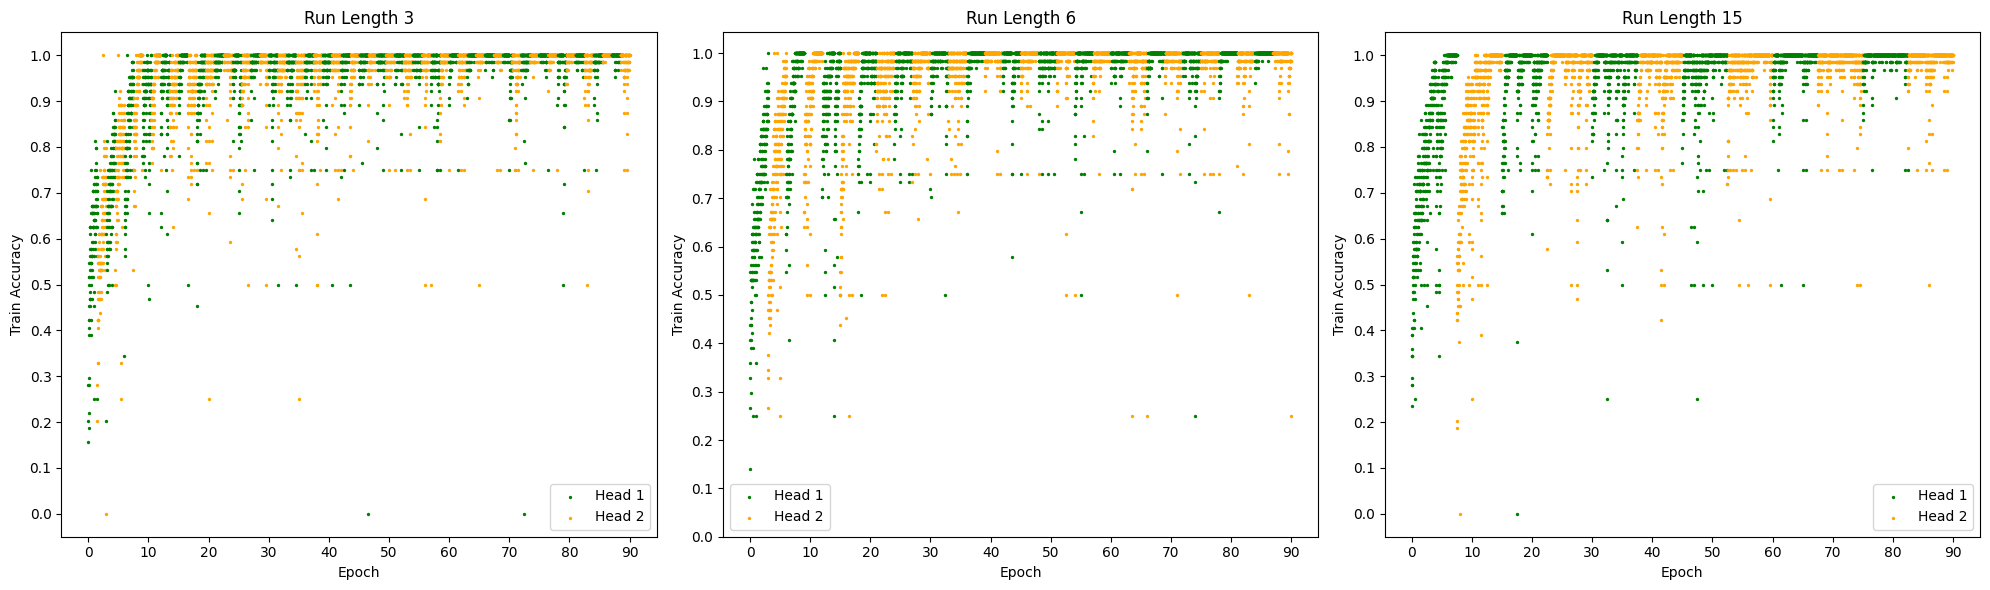

In [17]:
nof_epochs = 90
step_sizes = [40, 40]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_run_length(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}.png")
plt.show()


Total steps: 7200
Total steps: 7200
Total steps: 7200


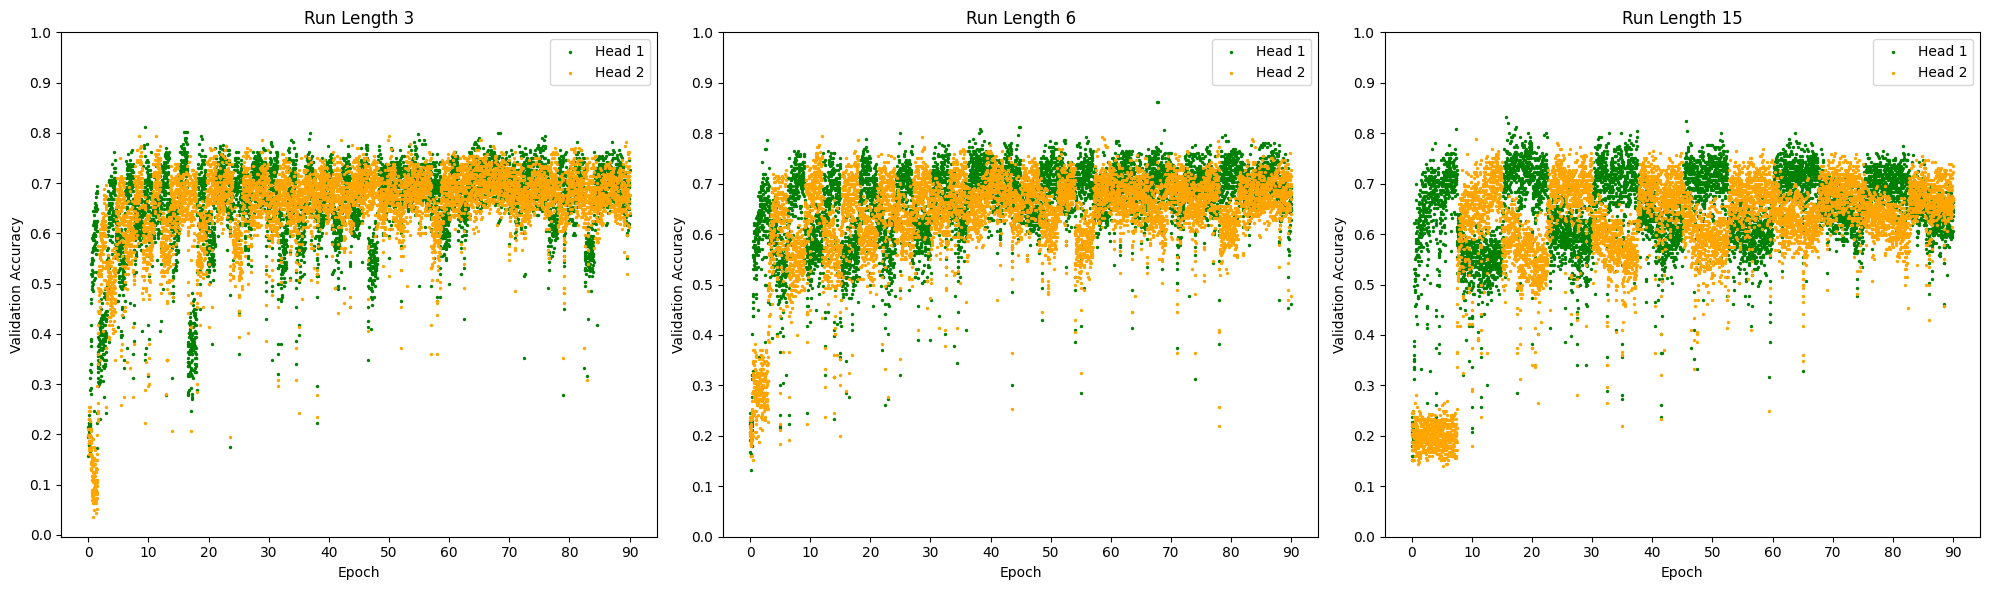

In [43]:
nof_epochs = 90
step_sizes = [40, 40]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_validation(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}_validation.png")
plt.show()

# MNIST5-FashionMNIST5

In [44]:
folder = './mnist5_fashionmnist5'
files = os.listdir(folder)
json_files = [f for f in files if f.endswith('.json')]
#sort the json files
json_files = sorted(json_files, key=lambda x: int(x.split('_')[0][2:]))

dfs = []  # dfs list 
rls = [ int(filename.split('_')[0][2:]) for filename in json_files]
rls = sorted(rls, key=lambda x: int(x)) # sort the rls

# Read the json files via pd.read_json
for file in json_files:
    df = pd.read_json(folder + '/' + file)
    dfs.append(df)

json_files, rls

(['rl3_bs512_epochs90_SGD_lr0.02_momentum0.0.json',
  'rl6_bs512_epochs90_SGD_lr0.02_momentum0.0.json',
  'rl15_bs512_epochs90_SGD_lr0.02_momentum0.0.json'],
 [3, 6, 15])

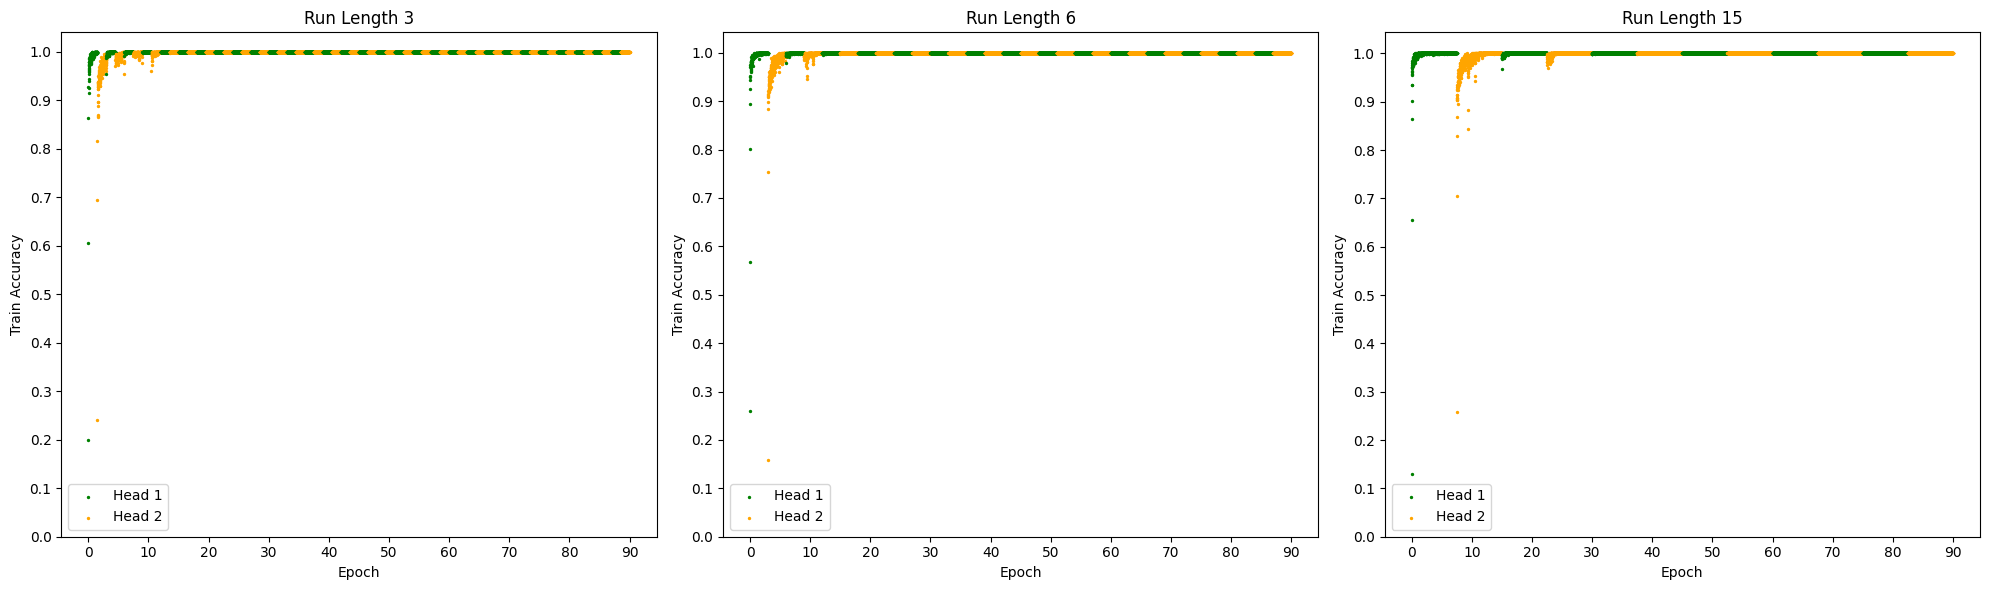

In [20]:
nof_epochs = 90
step_sizes = [60, 59]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_run_length(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}.png")
plt.show()


Total steps: 10710
Total steps: 10710
Total steps: 10710


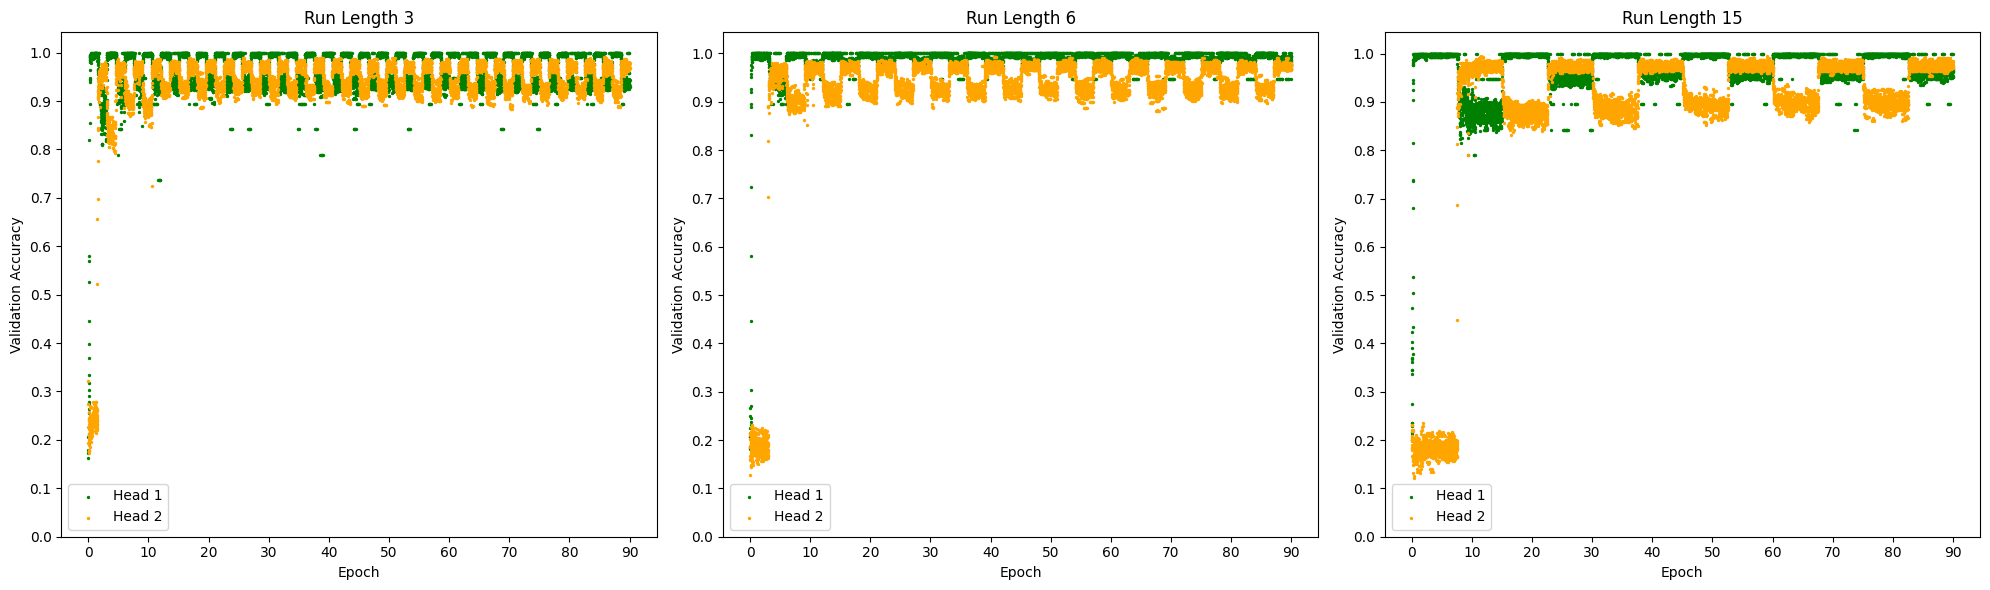

In [45]:
nof_epochs = 90
step_sizes = [60, 59]
plt.figure(figsize=(20, 6))

for i, (df, rl) in enumerate(zip(dfs, rls)):
    ax = plt.subplot(1, 3, i + 1)
    plot_validation(df, rl, ax, nof_epochs=nof_epochs,step_sizes=step_sizes)

plt.tight_layout()
plt.savefig(f"{folder.split('/')[1]}_validation.png")
plt.show()